# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Terraria_1.csv")
df.head()

,userName,score,at,content
0,Sun GGL0l (Gamer),5,2024-06-07 09:27:45,Better than Minecraft
1,akun mati,5,2024-06-07 06:27:14,Well... I lost all my progress so... Good Luck...
2,epang x,5,2024-06-06 18:19:07,dulu pernah nyoba bajakan tpi gak paham kontro...
3,met gale,5,2024-06-06 16:41:38,OG game
4,Adit Game12,5,2024-06-06 07:31:17,👍


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Better than Minecraft,Sun GGL0l (Gamer),2024-06-07 09:27:45
1,Well... I lost all my progress so... Good Luck...,akun mati,2024-06-07 06:27:14
2,dulu pernah nyoba bajakan tpi gak paham kontro...,epang x,2024-06-06 18:19:07
3,OG game,met gale,2024-06-06 16:41:38
4,👍,Adit Game12,2024-06-06 07:31:17
...,...,...,...
995,"Petualangan nya baguss,bos bosnya banyak dan b...",Shins,2022-11-26 11:28:18
996,Cukup mahal nih game tapi seru banget aku 5 ka...,Muhammad Farhan,2022-11-26 07:47:17
997,cih ngebajak dek?,Yasss.,2022-11-25 03:33:12
998,"Setelah di update bingung mainnya bagaimana, p...",Tirza Bicara:,2022-11-24 14:53:22


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   1000 non-null   object
 1   userName  1000 non-null   object
 2   at        1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,1000,1000,1000
unique,884,1000,1000
top,Mantap,Sun GGL0l (Gamer),2024-06-07 09:27:45
freq,24,1,1


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(1000, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(884, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,better than minecraft,Sun GGL0l (Gamer),2024-06-07 09:27:45
1,well i lost all my progress so good luck for me,akun mati,2024-06-07 06:27:14
2,dulu pernah nyoba bajakan tpi gak paham kontro...,epang x,2024-06-06 18:19:07
3,og game,met gale,2024-06-06 16:41:38
4,,Adit Game12,2024-06-06 07:31:17
...,...,...,...
995,petualangan nya bagussbos bosnya banyak dan ba...,Shins,2022-11-26 11:28:18
996,cukup mahal nih game tapi seru banget aku kal...,Muhammad Farhan,2022-11-26 07:47:17
997,cih ngebajak dek,Yasss.,2022-11-25 03:33:12
998,setelah di update bingung mainnya bagaimana pu...,Tirza Bicara:,2022-11-24 14:53:22


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,better than minecraft,Sun GGL0l (Gamer),2024-06-07 09:27:45
1,well i lost all my progress so good luck for me,akun mati,2024-06-07 06:27:14
2,dulu pernah nyoba bajakan tpi tidak paham kont...,epang x,2024-06-06 18:19:07
3,og game,met gale,2024-06-06 16:41:38
4,,Adit Game12,2024-06-06 07:31:17
...,...,...,...
995,petualangan nya bagussbos bosnya banyak dan ba...,Shins,2022-11-26 11:28:18
996,cukup mahal nih game tapi seru banget aku kal...,Muhammad Farhan,2022-11-26 07:47:17
997,cih ngebajak dek,Yasss.,2022-11-25 03:33:12
998,setelah di update bingung mainnya bagaimana pu...,Tirza Bicara:,2022-11-24 14:53:22


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,better than minecraft,Sun GGL0l (Gamer),2024-06-07 09:27:45
1,well i lost all my progress so good luck for me,akun mati,2024-06-07 06:27:14
2,dulu pernah nyoba bajakan tpi paham kontrolnya...,epang x,2024-06-06 18:19:07
3,og game,met gale,2024-06-06 16:41:38
4,,Adit Game12,2024-06-06 07:31:17
...,...,...,...
995,petualangan nya bagussbos bosnya banyak banyak...,Shins,2022-11-26 11:28:18
996,cukup mahal nih game seru banget aku kali tam...,Muhammad Farhan,2022-11-26 07:47:17
997,cih ngebajak dek,Yasss.,2022-11-25 03:33:12
998,di update bingung mainnya bagaimana pusing ter...,Tirza Bicara:,2022-11-24 14:53:22


In [18]:
# 3. Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                              [better, than, minecraft]
1      [well, i, lost, all, my, progress, so, good, l...
2      [dulu, pernah, nyoba, bajakan, tpi, paham, kon...
3                                             [og, game]
4                                                     []
                             ...                        
995    [petualangan, nya, bagussbos, bosnya, banyak, ...
996    [cukup, mahal, nih, game, seru, banget, aku, k...
997                                 [cih, ngebajak, dek]
998    [di, update, bingung, mainnya, bagaimana, pusi...
999    [lebih, baik, pada, minecraft, alasan, boss, l...
Name: content, Length: 884, dtype: object

In [19]:
# # 4. Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Terraria_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Terraria_1.csv', encoding = 'latin1')
df_clean

,content
0,better than minecraft
1,well i lost all my progress so good luck for me
2,dulu pernah nyoba baja tpi paham kontrol trus ...
3,og game
4,NaN
...,...
879,tualang nya bagussbos bos banyak banyak item i...
880,cukup mahal nih game seru banget aku kali tama...
881,cih ngebajak dek
882,di update bingung main bagaimana pusing terlal...


# **Translate**

In [21]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [22]:
# import pandas as pd
# from easynmt import EasyNMT

In [23]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Terraria_1.csv', encoding='latin1')

In [24]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [25]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [26]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [27]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Terraria_1.csv')

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Terraria_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,better than minecraft,better than minecraft
1,1,well i lost all my progress so good luck for me,well I lost all my progress so good luck for me
2,2,dulu pernah nyoba baja tpi paham kontrol trus ...,Once tried steel. But then uninstalled.
3,3,og game,og game
4,4,og game,og game
...,...,...,...
879,879,tualang nya bagussbos bos banyak banyak item i...,The auction is good. Boss is a lot of new item...
880,880,cukup mahal nih game seru banget aku kali tama...,It's pretty expensive. It's a fun game. I've f...
881,881,cih ngebajak dek,Jacked the deck.
882,882,di update bingung main bagaimana pusing terlal...,on update bewildered playing how dizzy too man...


# **Labeling**

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Terraria_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,better than minecraft,better than minecraft
1,1,well i lost all my progress so good luck for me,well I lost all my progress so good luck for me
2,2,dulu pernah nyoba baja tpi paham kontrol trus ...,Once tried steel. But then uninstalled.
3,3,og game,og game
4,4,og game,og game
...,...,...,...
879,879,tualang nya bagussbos bos banyak banyak item i...,The auction is good. Boss is a lot of new item...
880,880,cukup mahal nih game seru banget aku kali tama...,It's pretty expensive. It's a fun game. I've f...
881,881,cih ngebajak dek,Jacked the deck.
882,882,di update bingung main bagaimana pusing terlal...,on update bewildered playing how dizzy too man...


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 447
Netral = 265
Negatif = 172

Total Data Seluruhnya : 884


In [33]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,better than minecraft,better than minecraft,Positif
1,1,well i lost all my progress so good luck for me,well I lost all my progress so good luck for me,Positif
2,2,dulu pernah nyoba baja tpi paham kontrol trus ...,Once tried steel. But then uninstalled.,Netral
3,3,og game,og game,Negatif
4,4,og game,og game,Negatif
...,...,...,...,...
879,879,tualang nya bagussbos bos banyak banyak item i...,The auction is good. Boss is a lot of new item...,Positif
880,880,cukup mahal nih game seru banget aku kali tama...,It's pretty expensive. It's a fun game. I've f...,Negatif
881,881,cih ngebajak dek,Jacked the deck.,Netral
882,882,di update bingung main bagaimana pusing terlal...,on update bewildered playing how dizzy too man...,Positif


In [34]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,better than minecraft,better than minecraft,Positif
1,well i lost all my progress so good luck for me,well I lost all my progress so good luck for me,Positif
2,dulu pernah nyoba baja tpi paham kontrol trus ...,Once tried steel. But then uninstalled.,Netral
3,og game,og game,Negatif
4,og game,og game,Negatif
...,...,...,...
879,tualang nya bagussbos bos banyak banyak item i...,The auction is good. Boss is a lot of new item...,Positif
880,cukup mahal nih game seru banget aku kali tama...,It's pretty expensive. It's a fun game. I've f...,Negatif
881,cih ngebajak dek,Jacked the deck.,Netral
882,di update bingung main bagaimana pusing terlal...,on update bewildered playing how dizzy too man...,Positif


# **Visualisasi**


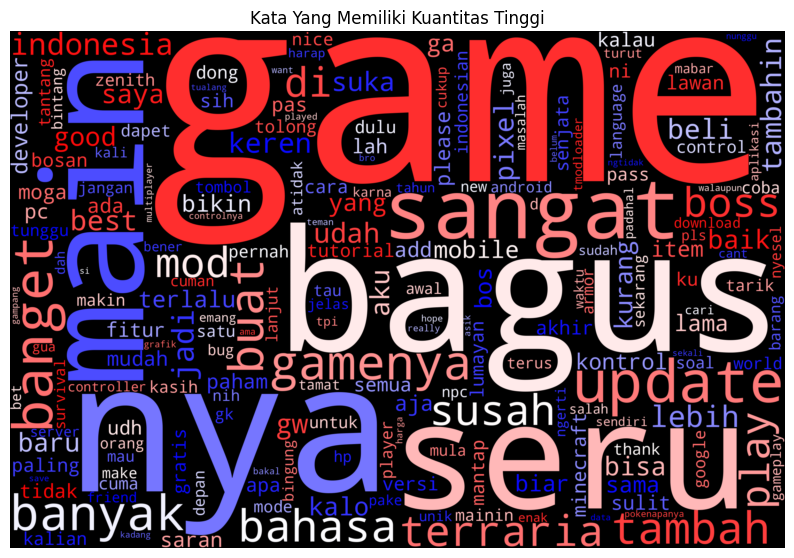

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


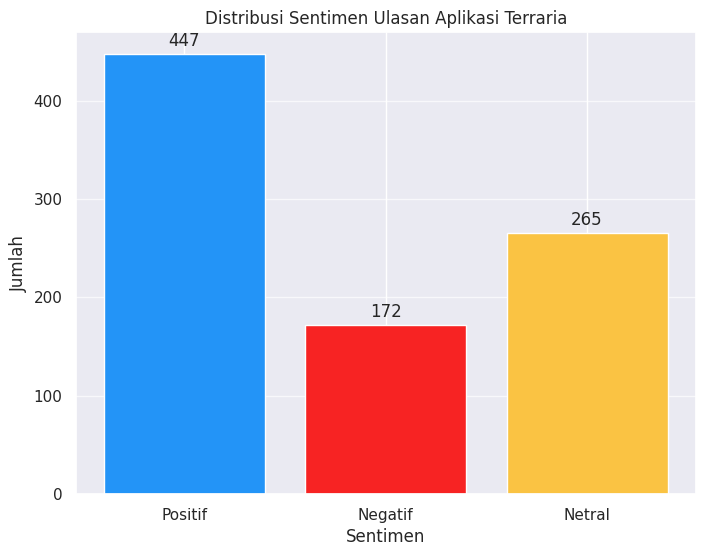

In [36]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Terraria")


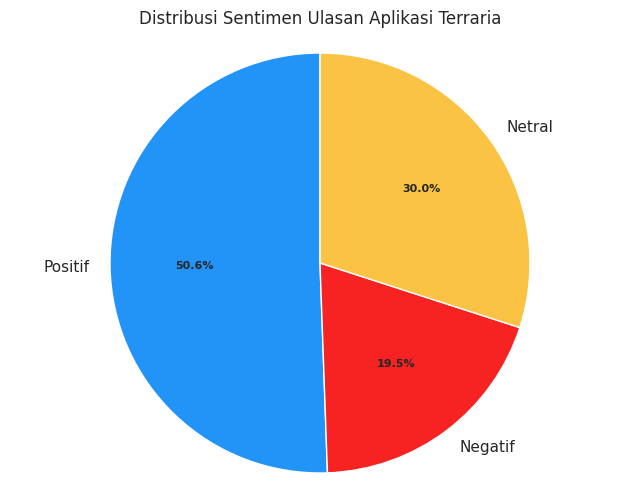

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Terraria")

In [38]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,better than minecraft,better than minecraft,Positif
1,well i lost all my progress so good luck for me,well I lost all my progress so good luck for me,Positif
3,og game,og game,Negatif
4,og game,og game,Negatif
5,bagus banget game nya trus ringan hp jadi enak...,It's a good game. Then it's light. It's so goo...,Positif
...,...,...,...
877,the best game,the best game,Positif
879,tualang nya bagussbos bos banyak banyak item i...,The auction is good. Boss is a lot of new item...,Positif
880,cukup mahal nih game seru banget aku kali tama...,It's pretty expensive. It's a fun game. I've f...,Negatif
882,di update bingung main bagaimana pusing terlal...,on update bewildered playing how dizzy too man...,Positif


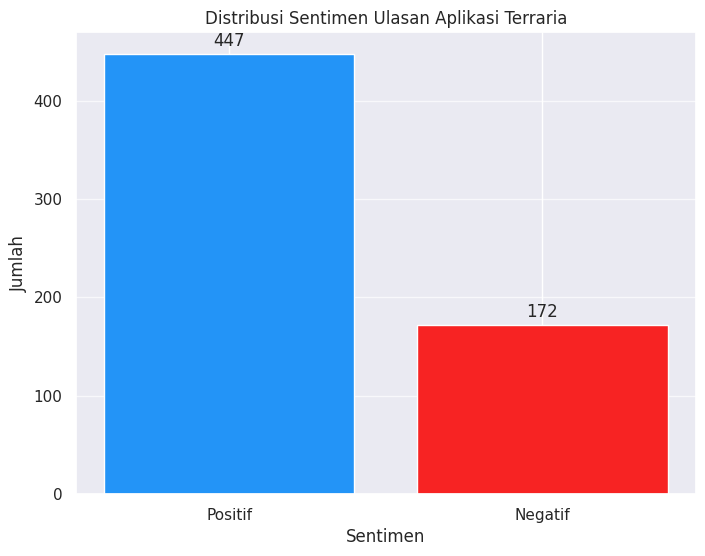

In [39]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Terraria")


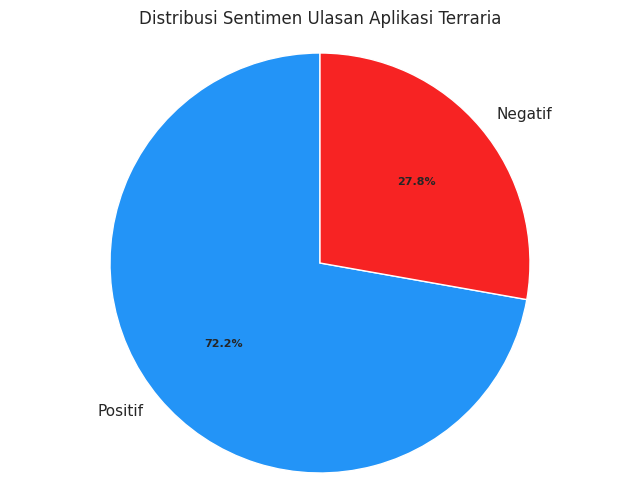

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Terraria")

In [41]:
data = data.replace({'Positif':0, 'Negatif':1})
data

,content,content_en,sentimen
0,better than minecraft,better than minecraft,0
1,well i lost all my progress so good luck for me,well I lost all my progress so good luck for me,0
3,og game,og game,1
4,og game,og game,1
5,bagus banget game nya trus ringan hp jadi enak...,It's a good game. Then it's light. It's so goo...,0
...,...,...,...
877,the best game,the best game,0
879,tualang nya bagussbos bos banyak banyak item i...,The auction is good. Boss is a lot of new item...,0
880,cukup mahal nih game seru banget aku kali tama...,It's pretty expensive. It's a fun game. I've f...,1
882,di update bingung main bagaimana pusing terlal...,on update bewildered playing how dizzy too man...,0


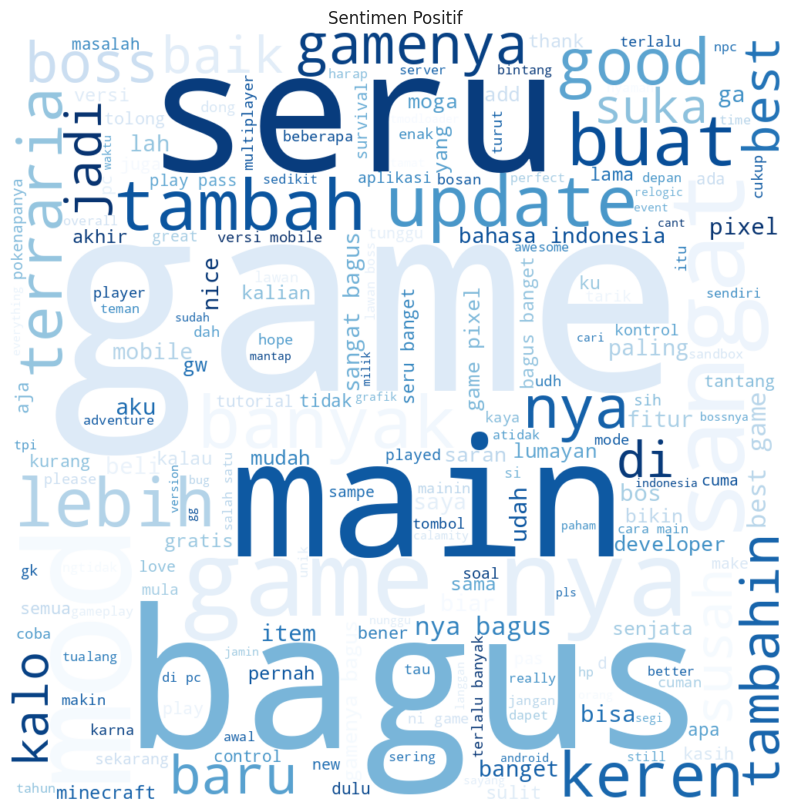

In [42]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data[data['sentimen'] == 0]
data_negatif = data[data['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

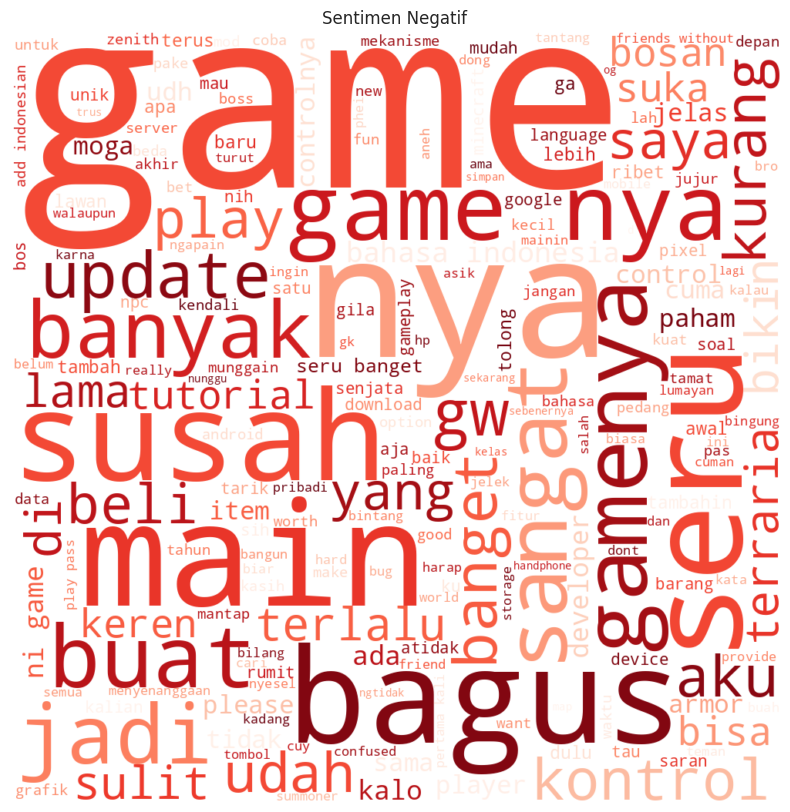

In [43]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

In [44]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
0    447
1    172
Name: count, dtype: int64

# **Data Preparation & Modeling**

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [46]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [47]:
X_train

446                                      plz new updatee
687    terimakasih atmin goggle beri play pass lama b...
443    bagussss bangett wajib dicobain jangan sampe k...
872              probably one of the most best game ever
43                                             good game
                             ...                        
102                          seru tidak nyesel beli game
149    jujur game banyak banget pesan moral nya salah...
384                                thiss game so awesome
621                                                bagus
141                                         fantasi baik
Name: content, Length: 371, dtype: object

In [48]:
# Menggunakan TfidfVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)


TfidfVectorizer()

In [49]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [50]:
X_train_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.7419354838709677
Akurasi untuk c = 0.05: 0.7379032258064516
Akurasi untuk c = 0.25: 0.7379032258064516
Akurasi untuk c = 0.5: 0.7379032258064516
Akurasi untuk c = 0.75: 0.7540322580645161
Akurasi untuk c = 1: 0.7580645161290323


In [52]:
linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

In [53]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.7580645161290323 


In [54]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 0.76
[[157  27]
 [ 33  31]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       184
           1       0.53      0.48      0.51        64

    accuracy                           0.76       248
   macro avg       0.68      0.67      0.67       248
weighted avg       0.75      0.76      0.75       248



In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Negatives (TN) = ', cm[0, 0])

print('\nTrue Positives (TP) = ', cm[1, 1])

print('\nFalse Negatives (FN) = ', cm[0, 1])

print('\nFalse Positives (FP) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[157  27]
 [ 33  31]]

True Negatives (TN) =  157

True Positives (TP) =  31

False Negatives (FN) =  27

False Positives (FP) =  33

Accuracy =  0.7580645161290323


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

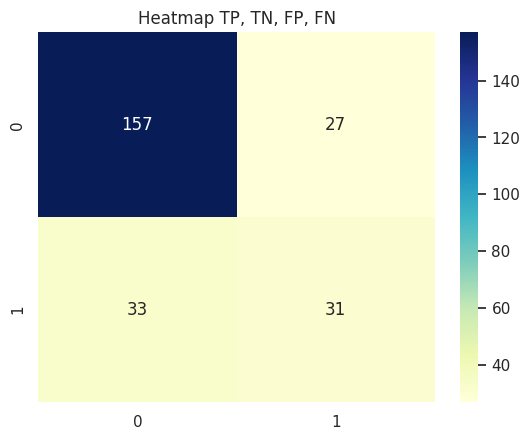

In [56]:
cm_matrix = pd.DataFrame(data=cm, columns=['0' , '1'],
                                 index=['0' , '1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [57]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [58]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7581


In [59]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2419


# **Testing**


In [60]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : bagus sekali gamenya
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 90.28%
Probabilitas: 90.28440823522821 %


In [69]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : jelek banget
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 61.19%
Probabilitas: 61.18925395662856 %
